# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For visual styling
sns.set(style="whitegrid")


## **Load Dataset**

In [2]:
# Load the dataset
df = pd.read_csv("Dataset-SA.csv")

# Quick preview
df.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


# **Dataset Overview**

In [3]:
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

Shape: (205052, 6)

Column Names: ['product_name', 'product_price', 'Rate', 'Review', 'Summary', 'Sentiment']

Data Types:
 product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

Missing Values:
 product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

Unique Values per Column:
 product_name       958
product_price      525
Rate                 8
Review            1324
Summary          92923
Sentiment            3
dtype: int64


# Dataset Overview:
- Shape: 205,052 rows × 6 columns
 - Columns: ['product_name', 'product_price', 'Rate', 'Review', 'Summary', 'Sentiment']
 - All columns were initially loaded as object (string) type.
 - 'product_price' and 'Rate' should be numeric but are currently strings — need type conversion.

- Missing values:
    - 'Review' has 24,664 missing entries (approx. 12% of dataset)
    - 'Summary' has 11 missing entries

- Categorical columns:
    - 'Sentiment' contains 3 classes: positive, negative, neutral
    - 'Rate' has 8 unique values, possibly with noisy/duplicate formats
- Text-heavy fields like 'Review' and 'Summary' are suitable for NLP analysis.


# **Summary Statistics**

In [7]:
print("\n--- Price Statistics ---\n", df["product_price"].describe())
print("\n--- Rating Statistics ---\n", df["Rate"].describe())
print("\n--- Review Length Stats ---\n", df["Review"].describe())
print("\n--- Summary Length Stats ---\n", df["Summary"].describe())
print("\n--- Sentiment Distribution ---\n", df["Sentiment"].value_counts())


--- Price Statistics ---
 count     205052
unique       525
top         1299
freq        9150
Name: product_price, dtype: object

--- Rating Statistics ---
 count     205052
unique         8
top            5
freq      118765
Name: Rate, dtype: object

--- Review Length Stats ---
 count        180388
unique         1324
top       wonderful
freq           9016
Name: Review, dtype: object

--- Summary Length Stats ---
 count     205041
unique     92923
top         good
freq       17430
Name: Summary, dtype: object

--- Sentiment Distribution ---
 Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64


# Column-Level Summary:
- product_price:
   - 525 unique values; most frequent = '1299' (9,150 occurrences)
   - Needs numeric conversion for statistical analysis (currently object)
- Rate:
    - 8 unique values; dominated by rating '5' (118,765 entries)
    - Strong right-skewed preference toward high ratings
- Review:
    - 180,388 non-null values; 1,324 unique entries
    - Most frequent review = 'wonderful' (9,016 times)
    - Indicates short, repetitive reviews common in dataset
- Summary:
   - 205,041 non-null values; very diverse with 92,923 unique entries
   - Most common summary = 'good' (17,430 times)
- Sentiment:
     - Highly imbalanced: positive (81.2%), negative (13.7%), neutral (5%)
     - Class imbalance should be addressed in modeling phase


# **Sentiment Distribution Plot**

/tmp/ipython-input-8-3816733051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index, palette="pastel")


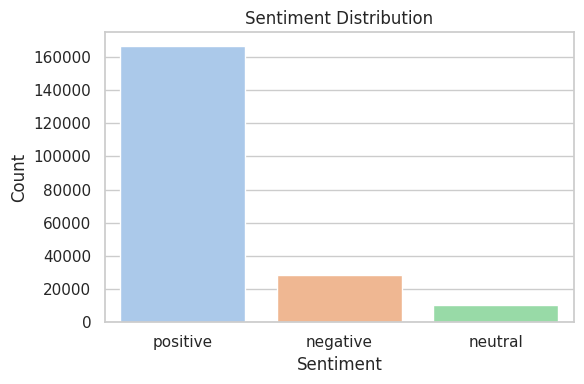

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index, palette="pastel")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Graph show same things that we see in numeric way above

Highly imbalanced: positive (81.2%), negative (13.7%), neutral (5%)

# **Rating Distribution**

In [15]:
df['Rate'].unique()

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

Rated Column should have the numerical category like 1,2 ..5 but it has some extra data that should be removed from it. So it is uncessary data that may be placed in wrong column

In [12]:
df["Rate_cleaned"] = pd.to_numeric(df["Rate"], errors="coerce")

/tmp/ipython-input-13-2069836439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rate_cleaned", data=df, palette="muted", order=sorted(df["Rate_cleaned"].dropna().unique()))


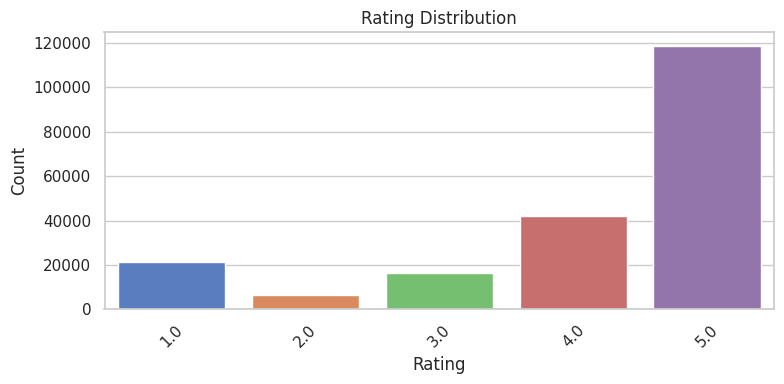

In [13]:
plt.figure(figsize=(8, 4))  # Slightly wider figure
sns.countplot(x="Rate_cleaned", data=df, palette="muted", order=sorted(df["Rate_cleaned"].dropna().unique()))
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

Mostly data shows a high rating

# **Product Price Distribution**

In [17]:
df["product_price_cleaned"] = pd.to_numeric(df["product_price"], errors="coerce")

Product price column also has the text data. That is also may be miss placed in this column. So we can handle it properly by removing these data from it

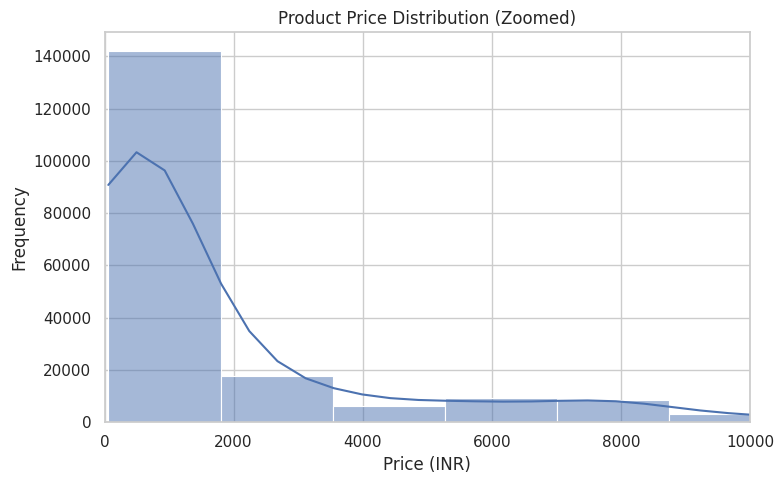

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["product_price_cleaned"], bins=50, kde=True)
plt.title("Product Price Distribution (Zoomed)")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.xlim(0, 10000)
plt.tight_layout()
plt.show()

# Product Price Distribution:
- Most products are priced below ₹2000, with a sharp peak in lower price ranges.
- The distribution is right-skewed — few products have very high prices.
- A large portion of the dataset (over 140K entries) falls within the ₹0–₹2000 range.
- Long tail visible beyond ₹2000 suggests some premium-priced outliers.
- Ideal to use log transformation or zoomed view (as shown) for better visual clarity.


# **Product Price by Sentiment**

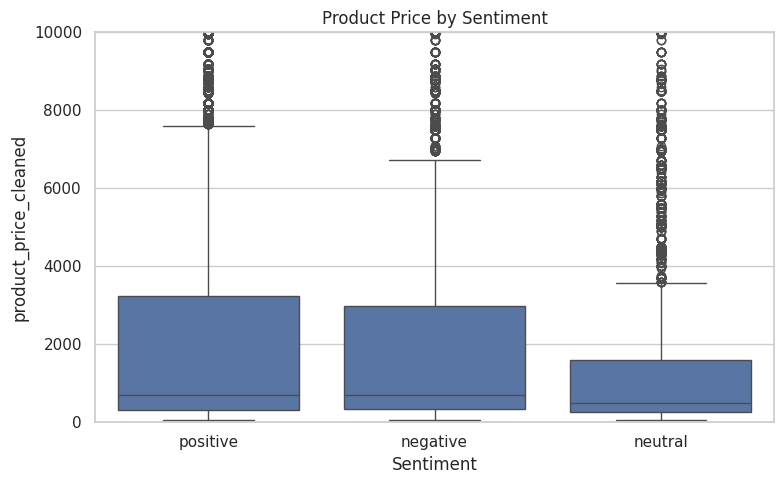

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Sentiment", y="product_price_cleaned", data=df)
plt.title("Product Price by Sentiment")
plt.ylim(0, 10000)
plt.tight_layout()
plt.show()

Data shows the outlier as well. SO we have to work on outliers as well when we start working on modling part